University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence<p>   
## Assignment: Organising a Colour Palette 
This notetbook offers some auxiliary code to support your programming assignment.    

### Reading the data file 

In [20]:
import numpy as np      # Numerical library, used keeing the list of colours and computing the Euclidean distance

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

#### Read and explore the data file: either the 10, 100, or 500 colours dataset

The colorus are stored in a list, where each element of the list is a numpy array of dimension 3. That is arrays of 3 real numbers where the real numbers indicate the R,G, and B values of the colour (RGB colour model). 

In [21]:
ncolors, colors = read_data("col100.txt")

print(f'Number of colours: {ncolors}')
print("First 5 colours:")
print(colors[0:5,  :])

Number of colours: 96
First 5 colours:
[[0.96645354 0.4407326  0.00749147]
 [0.91097596 0.939269   0.58222757]
 [0.67156348 0.08393823 0.76648093]
 [0.23680978 0.03081402 0.78877272]
 [0.34608897 0.62328148 0.6158157 ]]


### Plotting a sequence of colours

The function <b>plot_colors()</b> displaysthe colours from the color list *col_list* the order given by the *col_order* list. 

*col_list* and *col_order* need to be of the same length. The *ratio* parameter indicates height/width proportion of each bar of colour in the plot.

In [22]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Examples of ploting a colour ordering

Let us see how to call the plot function, using the original order in which the colours appear in the data file, and another randomised order.

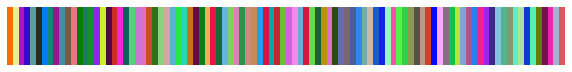

Another random solution:  [47, 62, 79, 85, 14, 23, 91, 93, 12, 17, 10, 0, 20, 52, 2, 28, 21, 64, 60, 92, 72, 1, 16, 22, 13, 59, 86, 57, 49, 75, 68, 24, 83, 71, 89, 90, 40, 9, 87, 31, 36, 45, 63, 34, 5, 65, 15, 54, 42, 53, 77, 4, 25, 39, 81, 94, 73, 3, 27, 82, 8, 32, 48, 43, 33, 50, 74, 88, 56, 30, 44, 51, 29, 41, 38, 35, 95, 80, 26, 58, 19, 69, 55, 6, 70, 7, 66, 78, 11, 18, 67, 76, 61, 46, 37, 84]


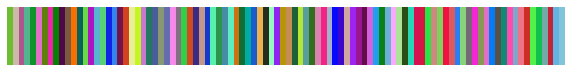

Same ordering of colurs with a larger ratio


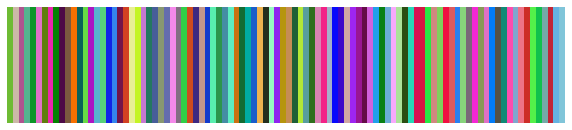

In [23]:
import random as rnd

# Plot all the colors in the order they are listd in the file
order1 = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
plot_colors(colors, order1)    #  You will notice that colors are not ordered in the file

# Function to generate a random solution (random ordering)  - we can generate a random ordering of the list by using
# the shuffle function from the random library
def random_sol():
    sol = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
    # Shuffle the elements in the list randomly. Shuffles in place and doesn’t retunr a value
    rnd.shuffle(sol)   
    return sol

order2 = random_sol()
print("Another random solution: ", order2)
plot_colors(colors, order2)  # the colors are not ordered, but this is a different order

# You can test different ratios of the hight/width of the lines in the plot
print("Same ordering of colurs with a larger ratio")
plot_colors(colors, order2, 20)

### Evaluation function to determine the quality of a given ordering of colours

When solving the problem using optimisation heuristics, we need an evaluation function to measure the quality of a sulution. The problem is formulated as a minimisation  problem. We want to minimise the pair-wise distance between consequtive colours in the ordering. 

This function computes the quality of given ordering of colours. The smaller the evaluation function the better, as this is is formulated as a minimisation problem

In [24]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

#### Evaluating the quality of given solutions

Let us use the evaluation function to calculate the quality of the arbitrary orderings of colours *order1* and *order2*

In [25]:
e1 = evaluate(colors, order1)
print(f'Evaluation of order1: {e1}') # Displaying all decimals
print(f'Evaluation of order1: {np.round(e1,4)}') # rounding to display only 4 decimals. This is better for display

e2 = evaluate(colors, order2)
print(f'Evaluation of order1: {e2}') # Displaying all decimals
print(f'Evaluation of order1: {np.round(e2,4)}') # rounding to display only 4 decimals. This is better for display

Evaluation of order1: 62.28133261068915
Evaluation of order1: 62.2813
Evaluation of order1: 63.41778514003889
Evaluation of order1: 63.4178


## Implementation of Hill-Climbing

The hill-climb works by using comparing the values of the current best solution to a version of that solution that has been altered by a random mutation. It is better to perform a random neighbour mutation on the current best solution rather than completely randomise it as a small mutation in the solution is more likely to get you closer to the optimum than a complete randomisation of the solution given, which would more likely take you further away from the optimum.

The following functions contain code for running a hill-climbing algorithm that performs a given number of iterations where each iteration a random neighbour is found and then compared to see if it is better than the current solution. In relation to the colours we want a smaller euclidian distance to achieve colours that are in better order. The hill-climb takes a variable called neighbourType which will determine how the random neighbour of the solution will be found. Depending on the neighbourType selected will test the mutations performed by the swap, inversion, and scramble functions.

In [26]:
# Switches two random points in the solution
# Input solution: the solution to be altered
# Output: next solution for the hill climb to evaluate
def swap(solution):
    pos1,pos2 = getRandomPositions(solution)
    nextSolution = solution[:]
    nextSolution[pos1],nextSolution[pos2] = solution[pos2],solution[pos1]
    return nextSolution

# Inverts the solution between 2 random points
# Input solution: the solution to be altered
# Output: next solution for the hill climb to evaluate
def inversion(solution):
    pos1,pos2 = getRandomPositions(solution)
    positions = solution[pos1:pos2] # gets the points from the solution that are between pos1 and pos2
    inverted = positions[::-1] # reverses the order of the list
    nextSolution = switchPlaces(pos1,inverted,solution)
    return nextSolution

# Scrambles the solution between 2 random points
# Input: solution: the solution to be altered
# Output: next solution for the hill climb to evaluate
def scramble(solution):
    pos1,pos2 = getRandomPositions(solution)
    positions = solution[pos1:pos2] # gets the points from the solution that are between pos1 and pos2
    rnd.shuffle(positions) # randomises order of the positions
    nextSolution = switchPlaces(pos1, positions, solution)
    return nextSolution

# Returns two random but unique points in the solution returned in order
# Input solution: The solution to be altered
# Output: two random positions
def getRandomPositions(solution):
    pos1 = rnd.randint(0,ncolors-1)
    pos2 = rnd.randint(0,ncolors-1)
    while solution[pos1] == solution[pos2]: # if new random position is already selected
        pos2 = rnd.randint(0,ncolors-1) # generate a new random position
    return min(pos1,pos2),max(pos1,pos2)

# Returns a solution that has had the chosen positions changed round
# Input pos1: The point where the altered positions start
#       Input positions: The positions to be changed for the next solution
#       Input solution: the solution to be altered
# Output: next solution for the hill climb to evaluate
def switchPlaces(pos1, positions, solution):
    for i in range(len(positions)):
        solution[pos1 + i] = positions[i]
    return solution

# random mutation is used to alter solution and if it's value is better than the current then keep that
# as the run value for the next to be compared against, and repeat for the number of iterations specified
# Input: startSolution: random solution for evaluations to develop from
#        tries: number of repetitions for hill-climbing
#        hc_iter: number of iterations for the hill-climbing
#        neighbourType: type of random neighbour to mutate the solution
# Output: The solution at the end of hill-climing, it's value and a trace of improvements
def hillClimb(startSolution, hcIter, neighbourType):
    trace = []
    runSolution = startSolution[:]
    runValue = evaluate(colors, runSolution)
    trace.append(runValue)
    for j in range(hcIter):
        nextSolution = randomNeighbour(runSolution, neighbourType)
        nextValue = evaluate(colors, nextSolution)
        if nextValue <= runValue:
            runValue = nextValue
            runSolution = nextSolution[:]
        trace.append(runValue)
    return runSolution,runValue,trace

# returns solution altered by one of the neighbourhoods
# Input: runSolution: the solution to be altered
#        neighbourType: type of random neighbour that will alter the solution
# Output: next solution for the hill climb to evaluate
def randomNeighbour(runSolution, neighbourType):
    nextSolution = []
    if neighbourType == "Scramble":
        nextSolution = scramble(runSolution)
    if neighbourType == "Inversion":
        nextSolution = inversion(runSolution)
    if neighbourType == "Swap":
        nextSolution = swap(runSolution)
    return nextSolution

### Multi Hill-climbing and Contrasting Performance

The following functions implement multiple runs of the hill-climbing function shown above and contrasts the performance of the different random neighbours.

In [69]:
# Multiple tries of hill-climbing
# Input: startSolution: random solution for evaluations to develop from
#        tries: number of repetitions for hill-climbing
#        hc_iter: number of iterations for the hill-climbing
#        neighbourType: type of random neighbour that will alter the solution
# Output: The best solution after trying hill-clibming serveral times,
#         it's value and trace of improvements
def multi_hc(startSolution, tries, hcIter, neighbourType):
    bestTrace = []
    bestSolution = startSolution[:]
    bestValue = evaluate(colors, bestSolution)
    for i in range(tries):
        runSolution, runValue,trace = hillClimb(startSolution, hcIter, neighbourType)
        if runValue <= bestValue:
            bestValue = runValue
            bestSolution = runSolution[:]
            bestTrace = trace[:]
    return bestSolution, bestValue, bestTrace

# Performs multiple tries of hill-climbing for each type of random neighbour
# Input: runs: random solution for evaluations to develop from
#        tries: number of repetitions for hill-climbing
#        hc_iter: number of iterations for the hill-climbing
# Output: The best solution for each type after trying hill-climbing several 
#         times, it's value and trace of improvements
def contrasting_performance(bestSolution, bestValue, runs, tries, hcIter):
    #Initialise variables
    scrambleValue = inversionValue = swapValue = bestValue
    scrambleSolution = inversionSolution = swapSolution = bestSolution
    scrambleTrace = inversionTrace = swapTrace = bestTrace = []
    for i in range(runs):
        scrambleSolution, scrambleValue, scrambleTrace = multi_hc(bestSolution, tries, hcIter, "Scramble")
        inversionSolution, inversionValue, inversionTrace = multi_hc(bestSolution, tries, hcIter, "Inversion")
        swapSolution, swapValue, swapTrace = multi_hc(bestSolution, tries, hcIter, "Swap")
    return scrambleSolution,inversionSolution,swapSolution,scrambleValue,inversionValue,swapValue,scrambleTrace,inversionTrace,swapTrace

# Compares the values of the multi_HC types to the current best
# Input: the values to be compared and the variables to update if the
#        next value  is better than the current best value
# Output: returns the best variables which will have been updated
#         if the next value was better than the current best
def getBest(scrambleSolution,scrambleValue,scrambleTrace,inversionSolution,inversionValue,
            inversionTrace,swapSolution,swapValue,swapTrace,scrambleName,inversionName,swapName):
        bestSolution, bestValue, bestTrace, bestName = scrambleSolution, scrambleValue, scrambleTrace, scrambleName
        bestSolution, bestValue, bestTrace,bestName = compare(bestSolution, bestValue, bestTrace, bestName,
                                                     inversionSolution, inversionValue, inversionTrace, inversionName)
        bestSolution, bestValue, bestTrace,bestName = compare(bestSolution, bestValue, bestTrace, bestName,
                                                              swapSolution, swapValue, swapTrace, swapName)
        return bestSolution, bestValue, bestTrace, bestName

# Compares the next value to the best then if it is better update it so the next
# is the best
# Input: the values to be compared and the variables to update if the
#        next value  is better than the current best value
# Output: returns the best variables which will have been updated
#         if the next value was better than the current best
def compare(bestSolution, bestValue, bestTrace, bestName, solution, value, trace, name):
    if value <= bestValue:
        bestValue = value
        bestSolution = solution[:]
        bestTrace = trace[:]
        bestName = name
    return bestSolution, bestValue, bestTrace, bestName

## Evaluation

### Contrasting Performance

The following demonstrates the effectiveness of the different random neighbour strategies. It takes multiple, runs of the multi_hc method where it tries multiple hill-climbs each with either the swap, scramble, or inversion method. It prints out the solution found, the best Euclidean distance found and a colour plot for each. This is done for the original random solution, swap, inversion, and scramble. It also displays a graph that has the trace of each to make the contrast of each performance easier to read. Finally, the best information for the best run is displayed as well as the name for the specific method that found it. The number of iterations for this is pretty low as I am only looking to demonstrate the contrast in performance rather than find the best euclidean distance.

Random un-sorted starting solution: 
Euclidean Distance: 60.129571515877736
Value order of solution: 
[90, 68, 48, 74, 76, 51, 57, 86, 31, 16, 45, 12, 93, 88, 66, 8, 49, 18, 52, 7, 87, 3, 63, 35, 55, 50, 19, 56, 73, 53, 14, 64, 47, 6, 10, 59, 28, 43, 40, 20, 37, 89, 9, 91, 34, 71, 41, 13, 1, 62, 11, 26, 24, 82, 32, 83, 92, 70, 85, 58, 21, 25, 33, 81, 38, 27, 39, 23, 80, 69, 15, 95, 60, 17, 67, 75, 22, 2, 4, 84, 72, 78, 44, 46, 29, 61, 30, 42, 54, 65, 0, 36, 79, 5, 77, 94]
Colour plot: 


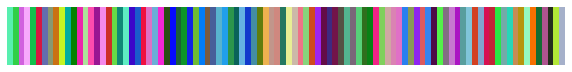

Best swap Euclidean Distance: 37.29305315109069
Value order of swap best solution: 
[90, 82, 3, 73, 20, 40, 10, 72, 31, 54, 88, 87, 84, 80, 83, 8, 0, 95, 42, 7, 58, 44, 35, 19, 55, 11, 81, 16, 77, 14, 89, 64, 63, 6, 57, 59, 75, 52, 29, 76, 60, 50, 49, 66, 93, 71, 41, 47, 1, 62, 94, 86, 24, 46, 18, 51, 92, 70, 91, 68, 21, 5, 33, 36, 38, 27, 74, 23, 15, 61, 28, 48, 2, 17, 32, 39, 22, 37, 4, 9, 78, 65, 30, 45, 13, 69, 79, 43, 67, 26, 85, 56, 12, 25, 53, 34]
Swap Colour plot: 


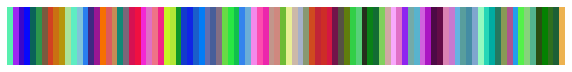

Best inversion Euclidean Distance: 55.60089337226831
Value order of inversion best solution: 
[49, 1, 39, 5, 67, 17, 38, 2, 92, 58, 9, 76, 7, 46, 79, 42, 91, 29, 87, 61, 65, 44, 82, 55, 50, 18, 37, 40, 52, 6, 22, 47, 26, 85, 48, 54, 12, 64, 93, 32, 11, 95, 20, 66, 23, 71, 28, 21, 27, 19, 90, 84, 80, 16, 69, 57, 75, 10, 62, 8, 89, 88, 43, 30, 41, 45, 74, 14, 72, 78, 56, 63, 68, 15, 53, 24, 34, 83, 36, 33, 51, 25, 59, 86, 35, 31, 0, 77, 4, 13, 70, 81, 60, 3, 73, 94]
Inversion colour plot: 


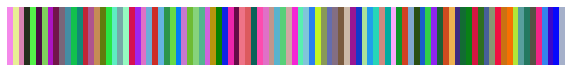

Best scramble Euclidean Distance: 54.229793562712445
Value order of scramble best solution: 
[34, 62, 32, 65, 45, 42, 66, 20, 69, 72, 18, 75, 58, 40, 14, 83, 0, 28, 74, 23, 21, 64, 56, 25, 47, 51, 59, 80, 63, 4, 82, 54, 55, 24, 39, 41, 93, 77, 90, 6, 57, 31, 79, 37, 71, 17, 86, 2, 68, 38, 1, 85, 50, 35, 76, 60, 29, 33, 11, 73, 88, 46, 30, 44, 43, 13, 36, 9, 49, 87, 26, 27, 19, 10, 67, 16, 91, 3, 81, 15, 95, 52, 8, 89, 12, 84, 7, 92, 48, 5, 70, 53, 78, 22, 61, 94]
Scramble Colour plot: 


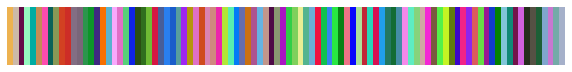

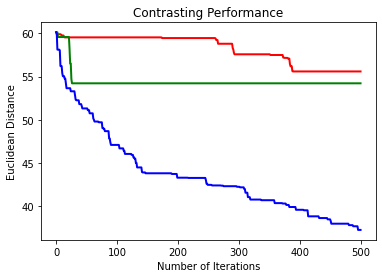

Inversion shown in red, scramble shown in green and swap shown in blue.

Best Euclidean Distance: 37.29305315109069
Found by the Swap neighbourhood
Final Solution: [90, 82, 3, 73, 20, 40, 10, 72, 31, 54, 88, 87, 84, 80, 83, 8, 0, 95, 42, 7, 58, 44, 35, 19, 55, 11, 81, 16, 77, 14, 89, 64, 63, 6, 57, 59, 75, 52, 29, 76, 60, 50, 49, 66, 93, 71, 41, 47, 1, 62, 94, 86, 24, 46, 18, 51, 92, 70, 91, 68, 21, 5, 33, 36, 38, 27, 74, 23, 15, 61, 28, 48, 2, 17, 32, 39, 22, 37, 4, 9, 78, 65, 30, 45, 13, 69, 79, 43, 67, 26, 85, 56, 12, 25, 53, 34]
Best colour plot: 


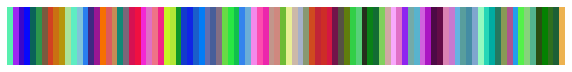

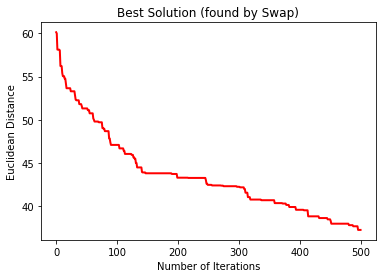

In [70]:
#read colour data from col100.txt generate random solution and call contrasting_performance
ncolors, colors = read_data("col100.txt")
unsortedSolution = random_sol()
unsortedValue = evaluate(colors,unsortedSolution)
scrambleSolution,inversionSolution,swapSolution,scrambleValue,inversionValue,swapValue,scrambleTrace,inversionTrace,swapTrace = contrasting_performance(unsortedSolution,unsortedValue,3,25,500)

#display the euclidean distance, colour plot found and order for the random solution
#this demonstrates the progress made by the hill-climbing
print('Random un-sorted starting solution: ')
print(f'Euclidean Distance: {unsortedValue}')
print('Value order of solution: ')
print(unsortedSolution)
print('Colour plot: ')
plot_colors(colors, unsortedSolution)

#display best euclidean distance found for swap, colour plot found and order of final solution
print(f'Best swap Euclidean Distance: {swapValue}')
print(f'Value order of swap best solution: ')
print(swapSolution)
print(f'Swap Colour plot: ')
plot_colors(colors, swapSolution)

#display best euclidean distance found for inversion, colour plot found and order of final solution
print(f'Best inversion Euclidean Distance: {inversionValue}')
print(f'Value order of inversion best solution: ')
print(inversionSolution)
print(f'Inversion colour plot: ')
plot_colors(colors, inversionSolution)

#display best euclidean distance found for swap, colour plot found and order of final solution
print(f'Best scramble Euclidean Distance: {scrambleValue}')
print(f'Value order of scramble best solution: ')
print(scrambleSolution)
print(f'Scramble Colour plot: ')
plot_colors(colors, scrambleSolution)

#display plot comparing the performance of the different methods
#in the hillClimb function I append the best run value even when it
#hasn't changed to demonstrate that the inversion and scramble methods
#reach a plateau after a shorter number of iterations than the swap
plt.figure()
plt.plot(inversionTrace,color='red', linewidth=2)
plt.plot(scrambleTrace,color='green', linewidth=2)
plt.plot(swapTrace,color='blue', linewidth=2)
plt.title('Contrasting Performance')
plt.ylabel('Euclidean Distance')
plt.xlabel('Number of Iterations')
plt.show()
print(f'Inversion shown in red, scramble shown in green and swap shown in blue.\n')

#display information for the best method
bestSolution, bestValue, bestTrace, bestName = getBest(scrambleSolution,scrambleValue,scrambleTrace,inversionSolution,
                                                       inversionValue,inversionTrace,swapSolution,swapValue,swapTrace,
                                                       "Scramble","Inversion","Swap")
print(f'Best Euclidean Distance: {bestValue}')
print(f'Found by the ' + bestName + ' neighbourhood')
print(f'Final Solution: {bestSolution}')
print(f'Best colour plot: ')
plot_colors(colors, bestSolution)
plt.figure()
plt.plot(bestTrace,color='red', linewidth=2)
plt.title('Best Solution (found by '+ bestName + ')')
plt.ylabel('Euclidean Distance')
plt.xlabel('Number of Iterations')
plt.show()

### Contrasting Performance Conclusion

The swap method produces much better results than either the scramble or inversion. This is because mutations to the solution at each iteration of the hill-climb are small so with enough iterations we can get close to the optimum. The scramble and inversion mutations alter multiple points in the solution so as the solution gets closer to the optimum the chance of making progress is reduced due to the fact the large number of random changes is more likely to take you further from the optimum than closer to it. Comparing the inversion and scramble shows that although they produce similar values the inversion is the worse of the two. This is because with the scramble method the points are randomised so there is a chance that some points will stay the same meaning a smaller increment is made whereas with inversion all the points are guaranteed to have changed and as mentioned before the large increments of change in the solution when getting towards the best the higher chance it is of taking a step backward than a step forward.

### Final Results

Best hill-climb value for each random neighbour method (swap, inversion, and scramble). Found with hill-climb iteration at 100000. Rounded to four decimal places. This is a bit of an overkill for the col100.txt file as even the swap plateaus at around 25000-30000 iterations.

In [ ]:
best100value_swap = 21.4558
best500value_swap = 102.1034
best100value_inversion = 53.3091
best500value_inversion = 305.4329
best100value_scramble = 51.3170
best500value_scramble = 302.2990

### Best Multi Hill-climb

Best multi_hc for 100 and 500 colours. These solutions were achieved by using the swap method as the random neighbour as from testing the other methods we can see this method produces the lowest euclidean distance. They were found with 5 tries of the hill-climb function set at 100000 iterations. mhc_best100 value is 21.4558 and mhc_best500 value is 102.1034.

In [ ]:
mhc_best100 = [20, 7, 13, 40, 76, 68, 21, 61, 62, 27, 34, 42, 54, 16, 77, 47, 14, 36, 53, 25, 91, 69, 71, 41, 95, 51, 44, 2, 48, 23, 55, 22, 94, 84, 37, 43, 45, 85, 4, 9, 57, 58, 59, 63, 60, 80, 6, 89, 83, 17, 32, 92, 46, 35, 81, 93, 66, 19, 82, 15, 73, 64, 3, 8, 70, 5, 56, 12, 33, 29, 67, 52, 38, 26, 86, 75, 79, 39, 74, 49, 11, 0, 31, 24, 72, 18, 10, 78, 50, 28, 30, 90, 87, 65, 88, 1]

mhc_best500 = [195, 358, 0, 423, 473, 412, 397, 170, 310, 312, 493, 316, 341, 362, 89, 407, 347, 126, 224, 466, 231, 335, 4, 295, 57, 236, 371, 274, 365, 208, 314, 12, 291, 222, 389, 187, 414, 47, 38, 112, 26, 21, 339, 386, 272, 210, 305, 60, 80, 109, 468, 308, 220, 416, 262, 428, 321, 52, 45, 59, 439, 334, 121, 215, 216, 20, 36, 33, 14, 119, 474, 154, 62, 293, 142, 431, 476, 349, 484, 159, 91, 424, 415, 27, 39, 402, 411, 257, 137, 304, 13, 485, 393, 419, 203, 441, 323, 151, 472, 387, 22, 306, 287, 148, 270, 102, 453, 5, 338, 370, 442, 44, 172, 8, 320, 207, 101, 246, 331, 266, 284, 352, 378, 194, 340, 90, 118, 107, 398, 382, 359, 461, 401, 108, 248, 298, 185, 42, 234, 249, 139, 282, 243, 363, 95, 271, 186, 61, 261, 110, 413, 281, 364, 280, 369, 37, 50, 488, 303, 311, 495, 456, 253, 374, 83, 480, 478, 251, 199, 394, 127, 232, 438, 355, 285, 463, 269, 465, 212, 409, 143, 131, 445, 34, 299, 162, 104, 483, 379, 342, 360, 152, 348, 319, 315, 64, 73, 218, 353, 75, 489, 443, 275, 35, 410, 93, 276, 469, 211, 153, 3, 324, 346, 179, 326, 191, 94, 226, 454, 427, 447, 79, 418, 265, 88, 283, 221, 182, 417, 436, 313, 9, 6, 486, 354, 452, 134, 136, 230, 327, 384, 19, 48, 204, 213, 177, 25, 171, 155, 53, 430, 357, 56, 158, 400, 201, 429, 237, 99, 98, 217, 325, 361, 40, 123, 76, 337, 29, 129, 322, 174, 122, 16, 399, 74, 372, 49, 180, 157, 450, 111, 260, 250, 166, 366, 373, 78, 296, 375, 97, 130, 309, 163, 181, 105, 433, 133, 160, 391, 292, 114, 383, 459, 184, 87, 279, 492, 150, 227, 30, 198, 475, 223, 85, 259, 277, 458, 487, 307, 96, 455, 467, 190, 329, 368, 58, 15, 318, 403, 168, 380, 161, 7, 200, 256, 267, 238, 228, 317, 440, 116, 278, 165, 420, 449, 462, 258, 70, 10, 376, 294, 24, 300, 144, 425, 106, 437, 1, 149, 178, 135, 69, 183, 206, 479, 239, 23, 55, 330, 128, 385, 176, 381, 192, 426, 117, 115, 82, 247, 193, 297, 457, 406, 164, 491, 197, 255, 18, 72, 46, 141, 209, 245, 51, 490, 2, 196, 92, 268, 17, 477, 63, 43, 225, 408, 67, 432, 421, 54, 31, 471, 332, 396, 233, 356, 240, 244, 263, 145, 390, 494, 214, 41, 446, 464, 470, 124, 68, 132, 125, 188, 289, 377, 138, 404, 344, 84, 28, 146, 451, 422, 448, 120, 367, 273, 202, 405, 219, 77, 175, 302, 252, 290, 254, 288, 205, 435, 343, 264, 460, 32, 336, 156, 242, 345, 86, 395, 66, 11, 100, 140, 241, 169, 481, 65, 229, 189, 301, 235, 434, 81, 103, 286, 333, 167, 392, 351, 147, 388, 444, 482, 71, 350, 113, 328, 173]
